In [1]:
import numpy as np
import pandas as pd

import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\preet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df=pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t',quoting=3)

In [3]:
df.shape

(1000, 2)

In [4]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
df['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

In [6]:
corpus = []
ps = PorterStemmer()

for i in range(0,df.shape[0]):
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df.Review[i]) #Cleaning special character from the message
    message = message.lower() #Converting the entire message into lower case
    words = message.split() # Tokenizing the review by words
    words = [word for word in words if word not in set(stopwords.words('english'))] #Removing the stop words
    words = [ps.stem(word) for word in words] #Stemming the words
    message = ' '.join(words) #Joining the stemmed words
    corpus.append(message) #Building a corpus of messages

In [7]:
corpus[0:10]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

In [8]:
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [10]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

In [11]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=501,criterion='entropy')
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=501)

In [12]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1], dtype=int64)

In [13]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
s1 = accuracy_score(y_test, y_pred)
s2 = precision_score(y_test, y_pred)
s3 = recall_score(y_test, y_pred)
print("Accuracy Score {} %".format(round(s1*100,2)))
print("Precision Score {} %".format(round(s2*100,2)))
print("Recall Score {} %".format(round(s3*100,2)))

Accuracy Score 71.5 %
Precision Score 74.7 %
Recall Score 63.27 %


In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[81, 21],
       [36, 62]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual values')

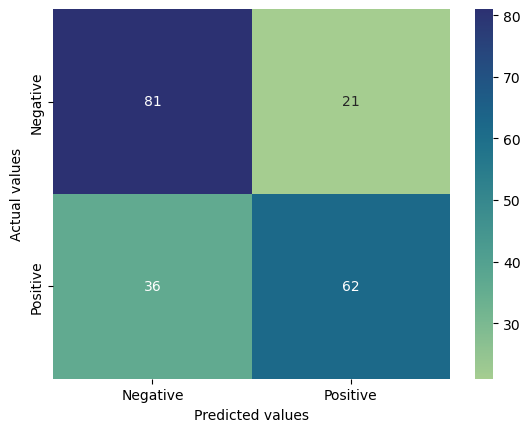

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(cm, annot=True, cmap="crest",xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [16]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(100,1000,100):
    temp_classifier = RandomForestClassifier(n_estimators=i,criterion='entropy')
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
    if score>best_accuracy:
        best_accuracy = score
        alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=100 is: 71.5%
Accuracy score for alpha=200 is: 72.5%
Accuracy score for alpha=300 is: 71.5%
Accuracy score for alpha=400 is: 72.0%
Accuracy score for alpha=500 is: 71.5%
Accuracy score for alpha=600 is: 71.5%
Accuracy score for alpha=700 is: 73.0%
Accuracy score for alpha=800 is: 72.0%
Accuracy score for alpha=900 is: 72.5%
--------------------------------------------
The best accuracy is 73.0% with alpha value as 700


In [17]:
model=RandomForestClassifier(n_estimators=200,criterion='entropy')
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [18]:
def predict_review(sample_message):
    sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_message = [ps.stem(word) for word in sample_message_words]
    final_message = ' '.join(final_message)
    temp = cv.transform([final_message]).toarray()
    return model.predict(temp)

In [19]:
result = ['Ohhh Shit! Negetive Review','Good! Positive Review']

In [20]:
msg = 'The food is really good here.'

if predict_review(msg):
    print(result[1])
else:
    print(result[0])

Good! Positive Review


In [21]:
msg = 'Food was pretty bad and the service was very slow.'

if predict_review(msg):
    print(result[1])
else:
    print(result[0])

Ohhh Shit! Negetive Review


In [22]:
msg = 'The food was absolutely wonderful, from preparation to presentation, very pleasing.'

if predict_review(msg):
    print(result[1])
else:
    print(result[0])

Good! Positive Review
